In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from IPython.display import Image
from IPython.display import display
img = Image(url='https://play.google/howplayworks/static/assets/social/share_google_play_logo.png')
display(img)

In [2]:
data_set = pd.read_csv("F:\Data Analyst Roadmap\Inrenship\Google Play Store EDA (Golden Project 2)\googleplaystore.csv")

In [3]:
data_set.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data_set.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
#check for basic information about the dataset
print("Dataset Information:")
data_set.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#summary of dataset

print("Summary statistics:")
data_set.describe()

Summary statistics:


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data_set.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
data_set.isnull().sum() *100 / len(data_set)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

- Missing Values:

The Rating column has missing values (9367 out of 10841 entries).

The Type, Content Rating, Current Ver, and Android Ver columns also have a few missing values.

- Data Types:

Reviews, Size, Installs, and Price are incorrectly stored as objects (they should likely be numeric after cleaning).

- Outliers:

The maximum value for Rating is 19, which is an unrealistic value as ratings are typically between 1 and 5.

# Handle Missing Values

In [9]:
#fill missing values in rating with median
data_set['Rating'].fillna(data_set['Rating'].median(), inplace=True)
data_set['Rating'].isnull().sum()

0

In [10]:
# set ratings to a maximum of 5
data_set['Rating'] = data_set['Rating'].apply(lambda x: min(x, 5))

print(data_set['Rating'].describe())

count    10841.000000
mean         4.206549
std          0.480380
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64


In [11]:
# Now fill missing values in Type, 'Content Rating', 'Current Ver', 'Android Ver' with mode  (most frequent value)

data_set['Type'].fillna(data_set['Type'].mode()[0], inplace=True)
data_set['Content Rating'].fillna(data_set['Content Rating'].mode()[0], inplace=True)
data_set['Current Ver'].fillna(data_set['Current Ver'].mode()[0], inplace=True)
data_set['Android Ver'].fillna(data_set['Android Ver'].mode()[0], inplace=True)

In [12]:
data_set.isnull().sum().sum()

0

# Now Fix Data Types

In [13]:
# convert Reviews to numeric
data_set['Reviews'] = pd.to_numeric(data_set['Reviews'], errors='coerce')

In [14]:
# Replace 'Free' with NaN
data_set['Installs'] = data_set['Installs'].replace('Free', pd.NA)

In [15]:
#Replace 'Free' with NaN
data_set['Installs'] = data_set['Installs'].replace('Free', pd.NA)

#Remove commas and plus signs from the 'Installs' column
data_set['Installs'] = data_set['Installs'].str.replace('[+,]', '', regex=True)

#Fill NaN values with 0
data_set['Installs'] = data_set['Installs'].fillna(0)

#convert 'Installs' to float
data_set['Installs'] = data_set['Installs'].astype(float)


print(data_set['Installs'].head())

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64


In [16]:
# Ensure 'Price' is treated as a string, then replace '$' and convert to numeric
data_set['Price'] = pd.to_numeric(data_set['Price'].astype(str).str.replace('$', ''), errors='coerce')

data_set['Price'] = data_set['Price'].fillna(0)  

print(data_set['Price'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64


In [17]:
# Clean 'Size' and convert to numeric
data_set['Size'] = data_set['Size'].replace('Varies with device', pd.NA)  # Handle special case
data_set['Size'] = data_set['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3')
data_set['Size'] = pd.to_numeric(data_set['Size'], errors='coerce')

In [18]:
print(data_set.info())
print("\nSample of cleaned data:")
print(data_set.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB
None

Sample of cleaned data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  

In [19]:
data_set.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
print(data_set.describe())

             Rating       Reviews          Size      Installs         Price
count  10841.000000  1.084000e+04  9.145000e+03  1.084100e+04  10841.000000
mean       4.206549  4.441529e+05  2.151653e+07  1.546291e+07      1.027273
std        0.480380  2.927761e+06  2.258875e+07  8.502557e+07     15.948971
min        1.000000  0.000000e+00  8.500000e+03  0.000000e+00      0.000000
25%        4.100000  3.800000e+01  4.900000e+06  1.000000e+03      0.000000
50%        4.300000  2.094000e+03  1.300000e+07  1.000000e+05      0.000000
75%        4.500000  5.477550e+04  3.000000e+07  5.000000e+06      0.000000
max        5.000000  7.815831e+07  1.000000e+08  1.000000e+09    400.000000


In [21]:
categorical_columns = data_set.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data_set[col].value_counts())
    print("\n")

Unique values in App:
App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64


Unique values in Category:
Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382


In [22]:

data_set.drop_duplicates(subset=['App'], keep='first', inplace=True)

aggregated_data = data_set.groupby('App').agg({'Rating': 'mean', 'Installs': 'sum'}).reset_index()


In [23]:
# Remove the invalid category "1.9"
data_set = data_set[data_set['Category'] != '1.9']

In [24]:
# Remove the invalid '0' value in the 'Type' column
data_set = data_set[data_set['Type'] != '0']


In [25]:
# Convert 'Last Updated' to datetime format
data_set['Last Updated'] = pd.to_datetime(data_set['Last Updated'])

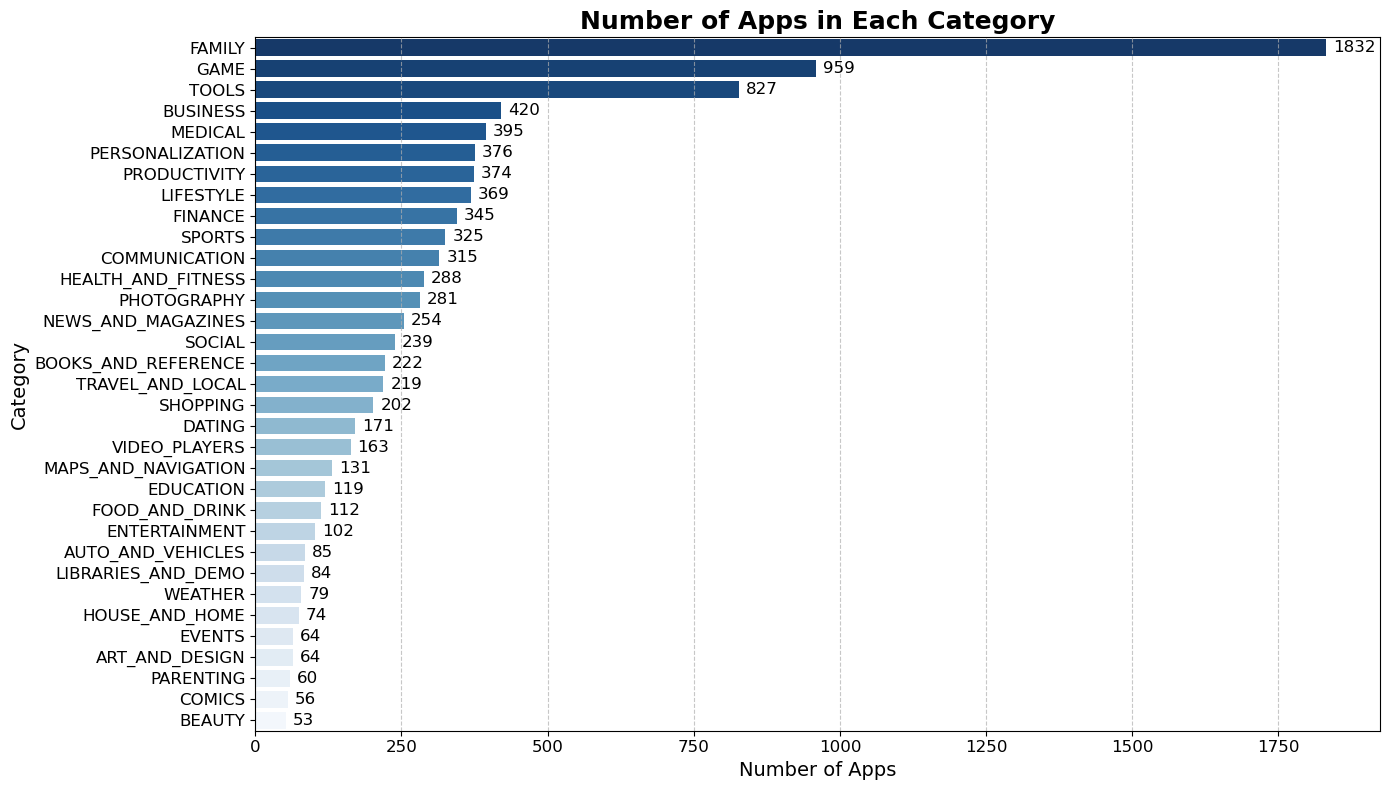

In [26]:
# Bar plot for app counts in each category
plt.figure(figsize=(14, 8))  
category_count = data_set['Category'].value_counts()

bar_plot = sns.barplot(y=category_count.index, x=category_count.values, palette='Blues_r')

# Add total count for each bar
for bar in bar_plot.patches:
    total = f'{int(bar.get_width())}'  
    plt.annotate(total, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Position the total counts at the end of each bar
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')


plt.title('Number of Apps in Each Category', fontsize=18, fontweight='bold')
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Now Apply Visualizations

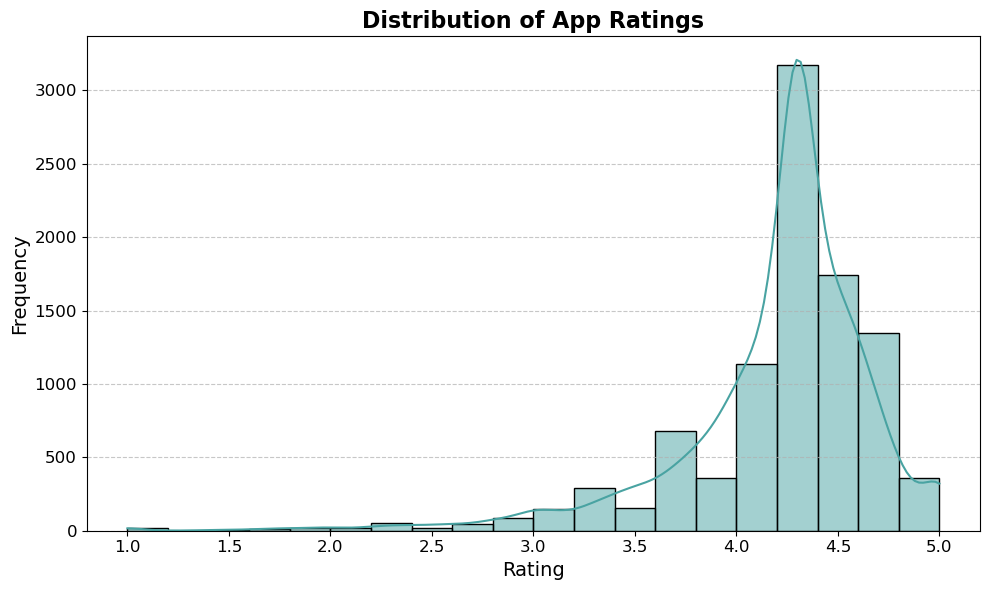

In [27]:
# Histogram for rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_set['Rating'].dropna(), bins=20, kde=True, color='#49a3a2')
plt.title('Distribution of App Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

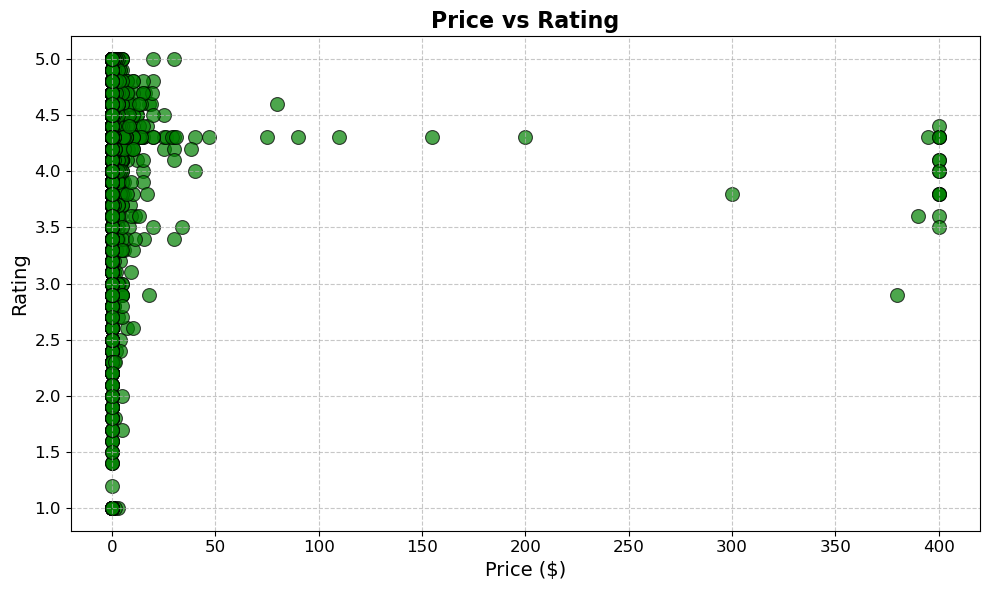

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=data_set, color='green', s=100, edgecolor='black', alpha=0.7)
plt.title('Price vs Rating', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

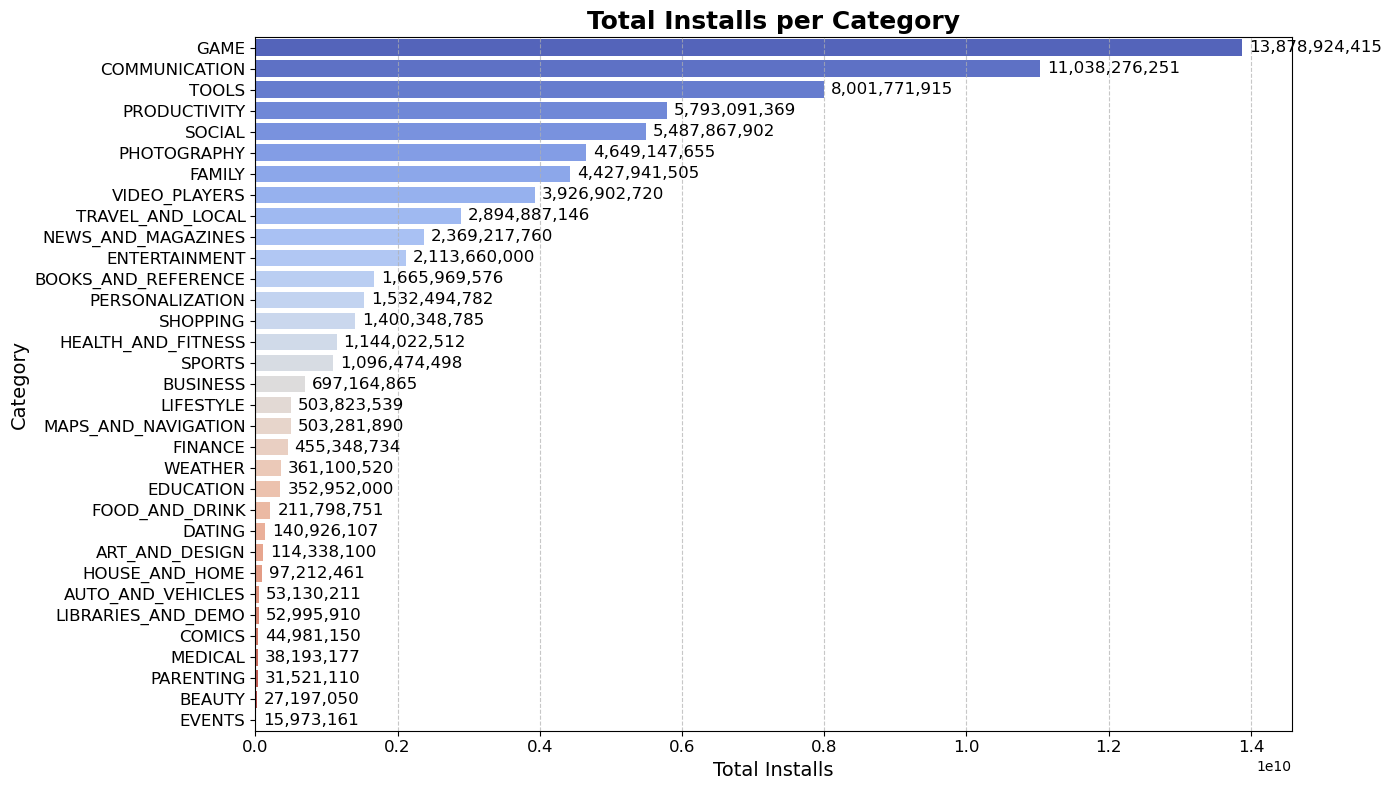

In [29]:
plt.figure(figsize=(14, 8))
category_installs = data_set.groupby('Category')['Installs'].sum().sort_values(ascending=False)
bar_plot = sns.barplot(x=category_installs.values, y=category_installs.index, palette='coolwarm')

for bar in bar_plot.patches:
    total = f'{int(bar.get_width()):,}'  # Format with commas for thousands
    plt.annotate(total, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Total Installs per Category', fontsize=18, fontweight='bold')
plt.xlabel('Total Installs', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


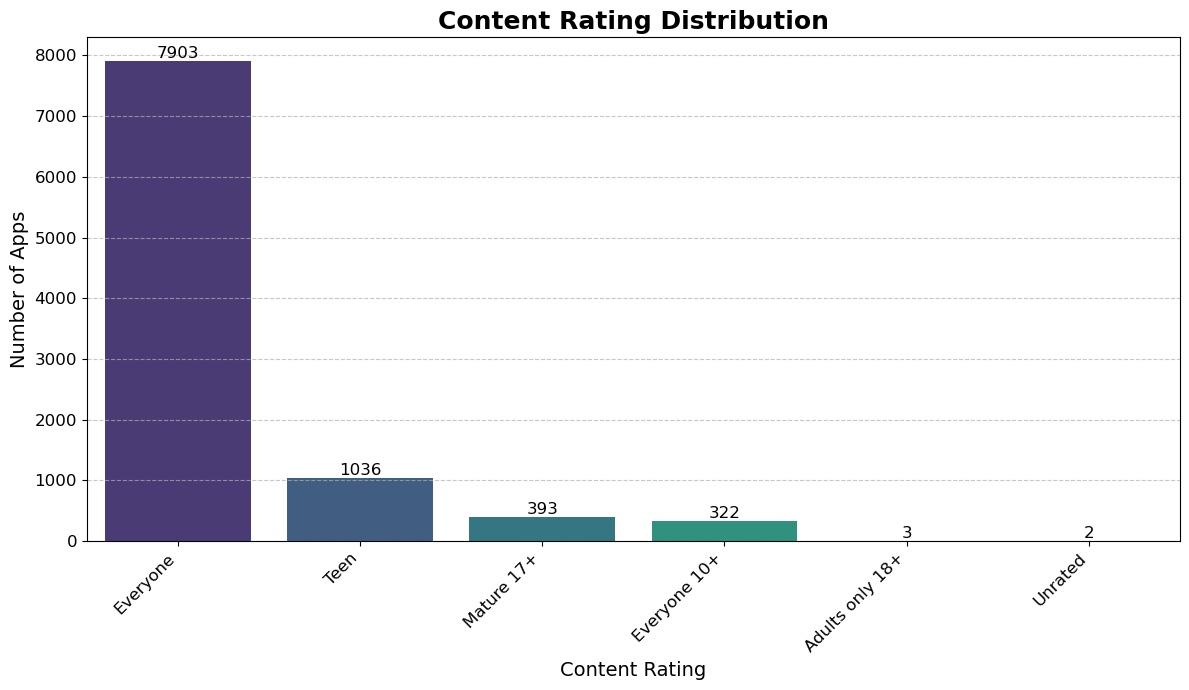

In [30]:
plt.figure(figsize=(12, 7))
content_rating_distribution = data_set['Content Rating'].value_counts()

bar_plot = sns.barplot(x=content_rating_distribution.index, y=content_rating_distribution.values, palette="viridis")

for bar in bar_plot.patches:
    total = f'{int(bar.get_height())}'  # Display total count on each bar
    plt.annotate(total, 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Content Rating Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary of Ratings:
count    9659.000000
mean        4.192442
std         0.496397
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Correlation Matrix:
            Rating     Price   Reviews  Installs
Rating    1.000000 -0.018662  0.050207  0.034307
Price    -0.018662  1.000000 -0.007598 -0.009405
Reviews   0.050207 -0.007598  1.000000  0.625165
Installs  0.034307 -0.009405  0.625165  1.000000


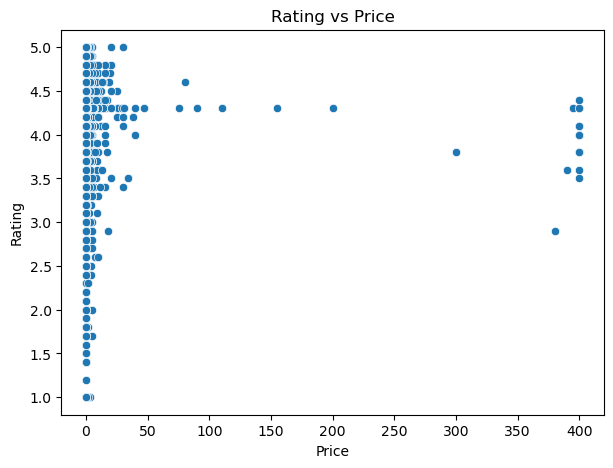

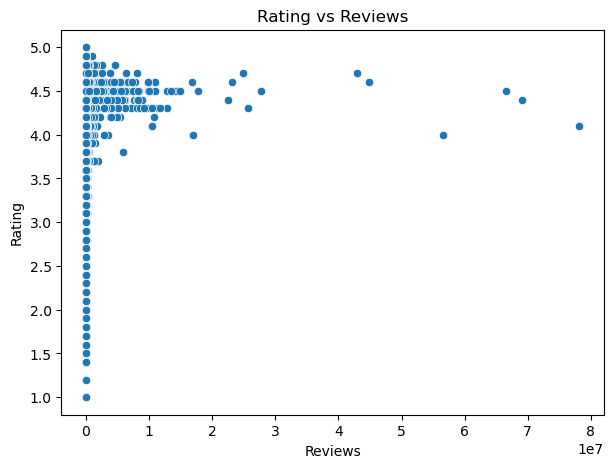

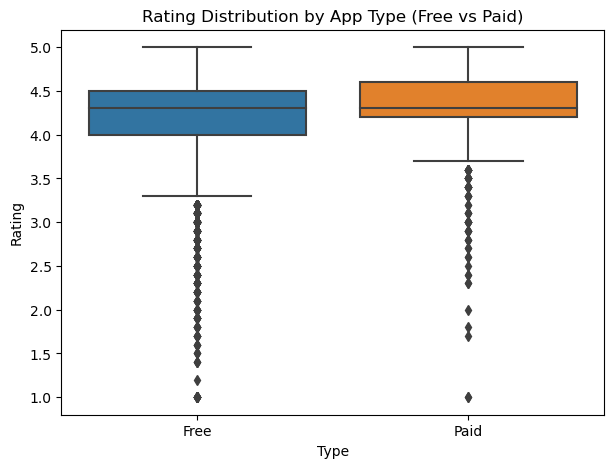

In [31]:

# Summary Statistics for Ratings
print("Summary of Ratings:")
print(data_set['Rating'].describe())

# Correlation Analysis
numerical_columns = ['Rating', 'Price', 'Reviews', 'Installs']  # Adjust with relevant columns
correlation_matrix = data_set[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

#Visualization: Scatter plot of Ratings vs Price
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data_set, x='Price', y='Rating')
plt.title('Rating vs Price')
plt.show()

# Visualization: Scatter plot of Ratings vs Reviews
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data_set, x='Reviews', y='Rating')
plt.title('Rating vs Reviews')
plt.show()

# Visualization: Box plot of Ratings vs Type (Free vs Paid)
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_set, x='Type', y='Rating')
plt.title('Rating Distribution by App Type (Free vs Paid)')
plt.show()


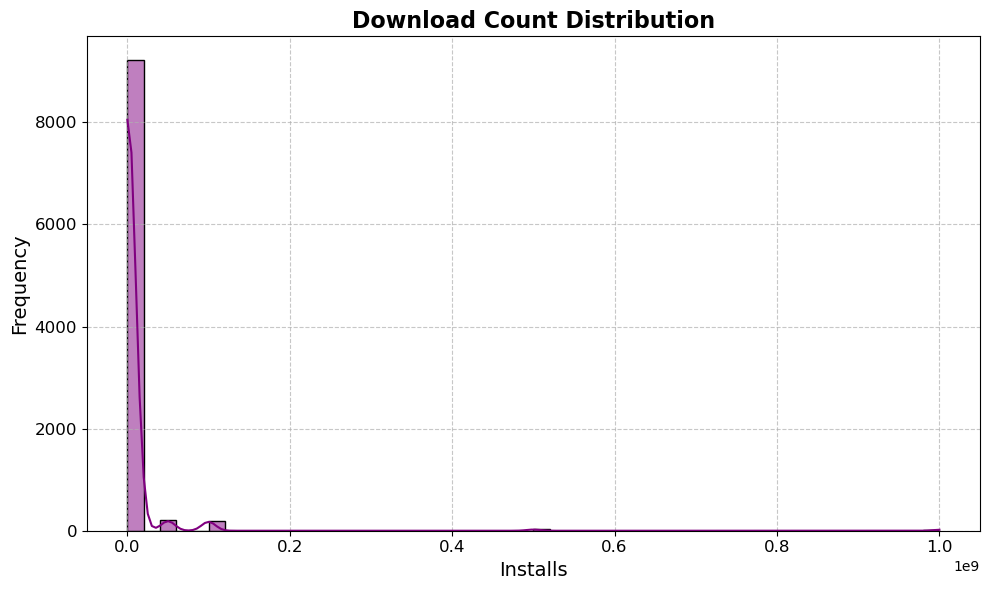

In [32]:
# Download Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_set['Installs'], bins=50, kde=True, color='purple')
plt.title('Download Count Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

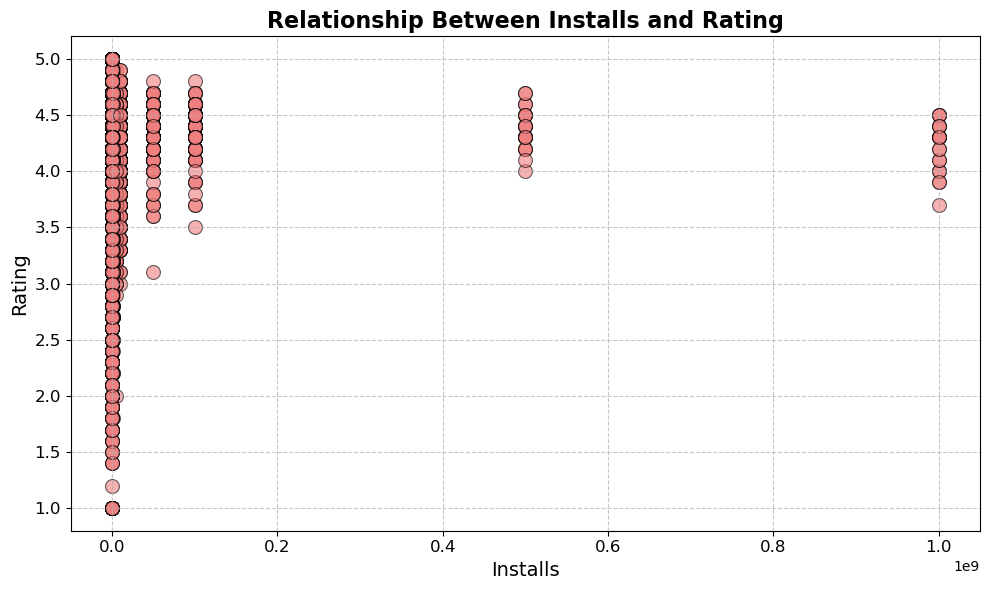

In [33]:
#Relationship Between Installs and Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_set, x='Installs', y='Rating', color='#F08080', s=100, edgecolor='black', alpha=0.6)
plt.title('Relationship Between Installs and Rating', fontsize=16, fontweight='bold')
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


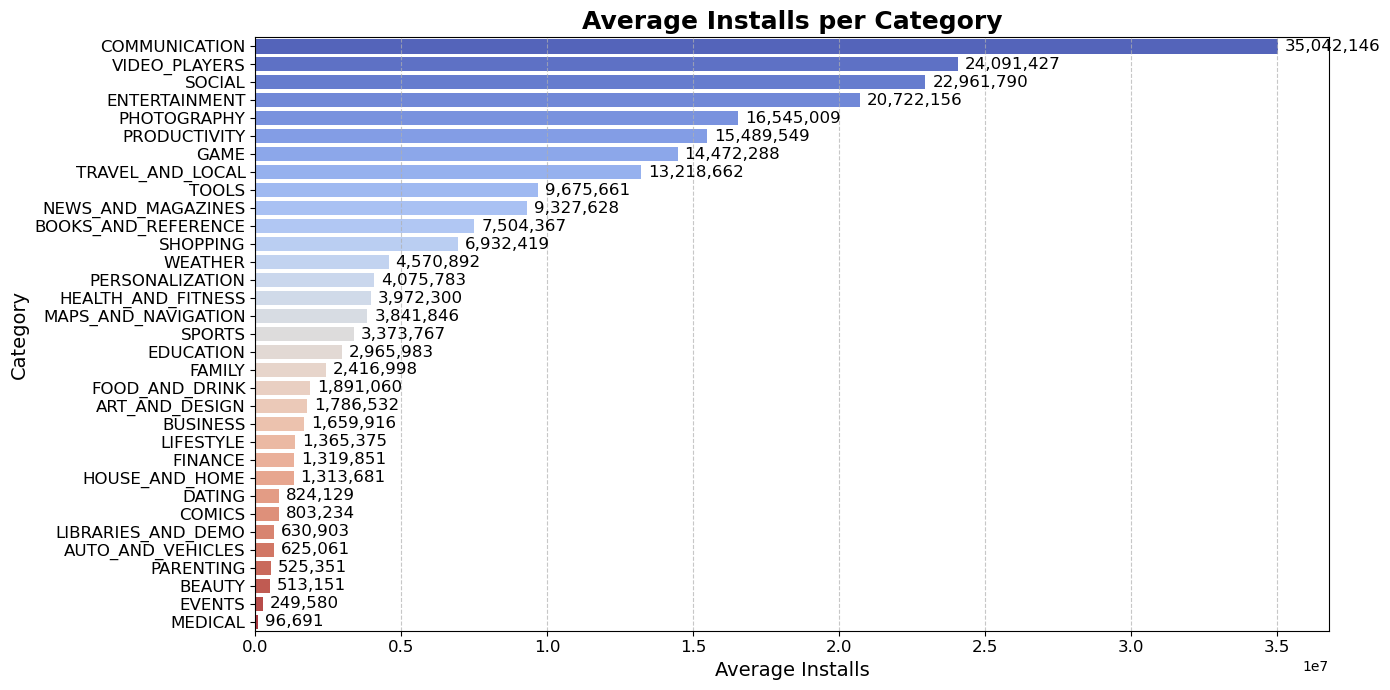

In [34]:
# 3. Category vs. Installs

plt.figure(figsize=(14, 7))
category_installs = data_set.groupby('Category')['Installs'].mean().sort_values(ascending=False)

bar_plot = sns.barplot(y=category_installs.index, x=category_installs.values, palette='coolwarm')

for bar in bar_plot.patches:
    total = f'{int(bar.get_width()):,}'  # Display formatted total installs
    plt.annotate(total, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Average Installs per Category', fontsize=18, fontweight='bold')
plt.xlabel('Average Installs', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


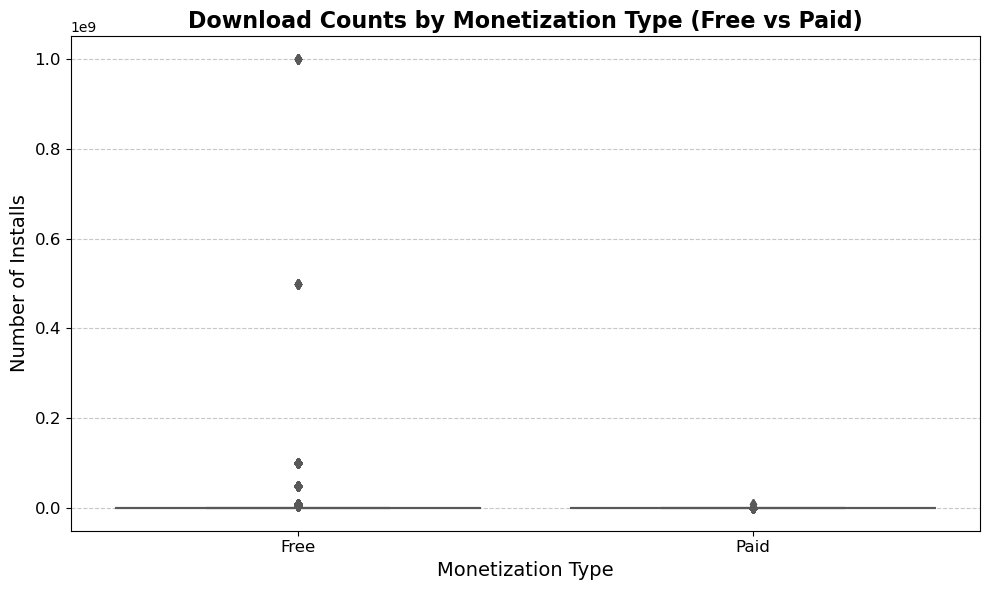

In [35]:
#Monetization (Free vs Paid) and Installs
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_set, x='Type', y='Installs', palette='Set2')
plt.title('Download Counts by Monetization Type (Free vs Paid)', fontsize=16, fontweight='bold')
plt.xlabel('Monetization Type', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


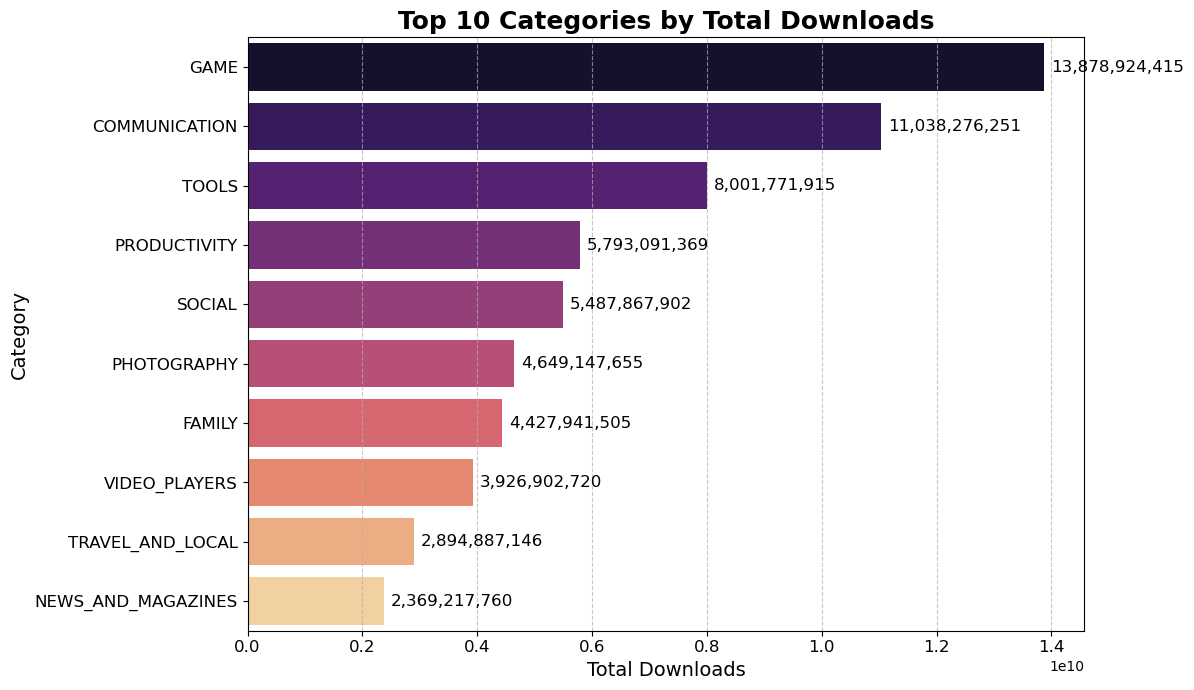

In [37]:
# Top Categories by Download Count

top_categories_by_installs = data_set.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10) #to check only top 10 category

plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=top_categories_by_installs.values, y=top_categories_by_installs.index, palette='magma')

for bar in bar_plot.patches:
    total = f'{int(bar.get_width()):,}'  # Display formatted total downloads
    plt.annotate(total, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Top 10 Categories by Total Downloads', fontsize=18, fontweight='bold')
plt.xlabel('Total Downloads', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

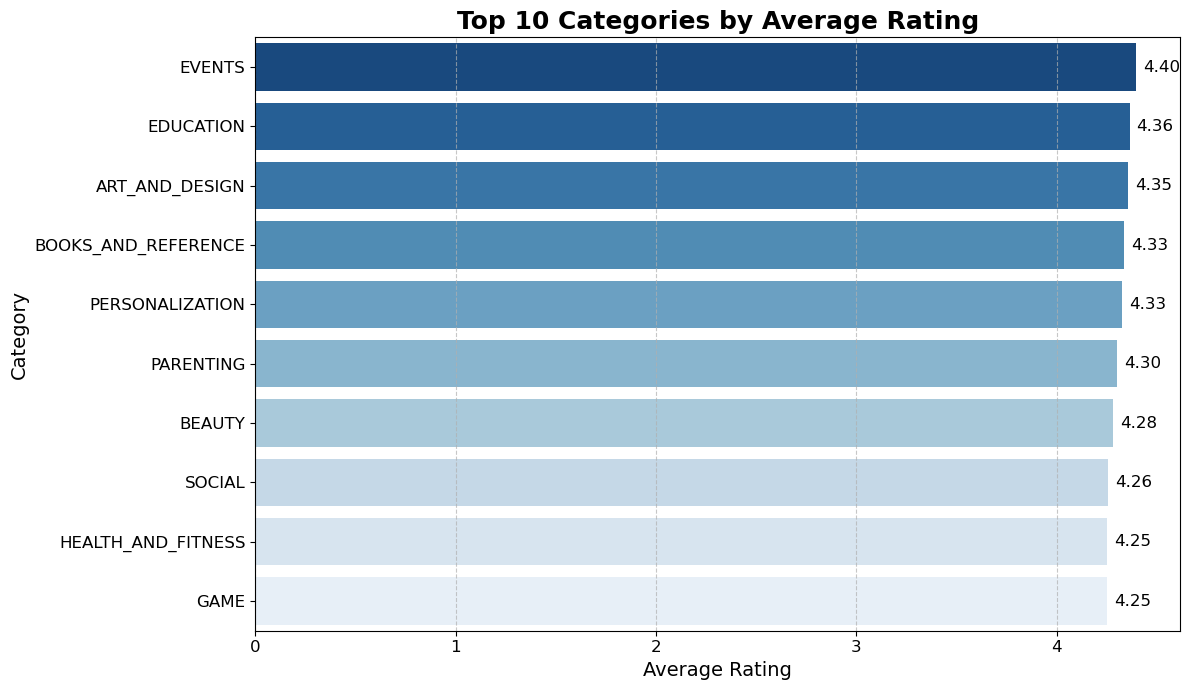

In [44]:

#  Top Categories by User Engagement (Rating)
top_categories_by_rating = data_set.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=top_categories_by_rating.values, y=top_categories_by_rating.index, palette='Blues_r')

for bar in bar_plot.patches:
    avg_rating = f'{bar.get_width():.2f}'  # Display average rating with two decimal places
    plt.annotate(avg_rating, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Top 10 Categories by Average Rating', fontsize=18, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


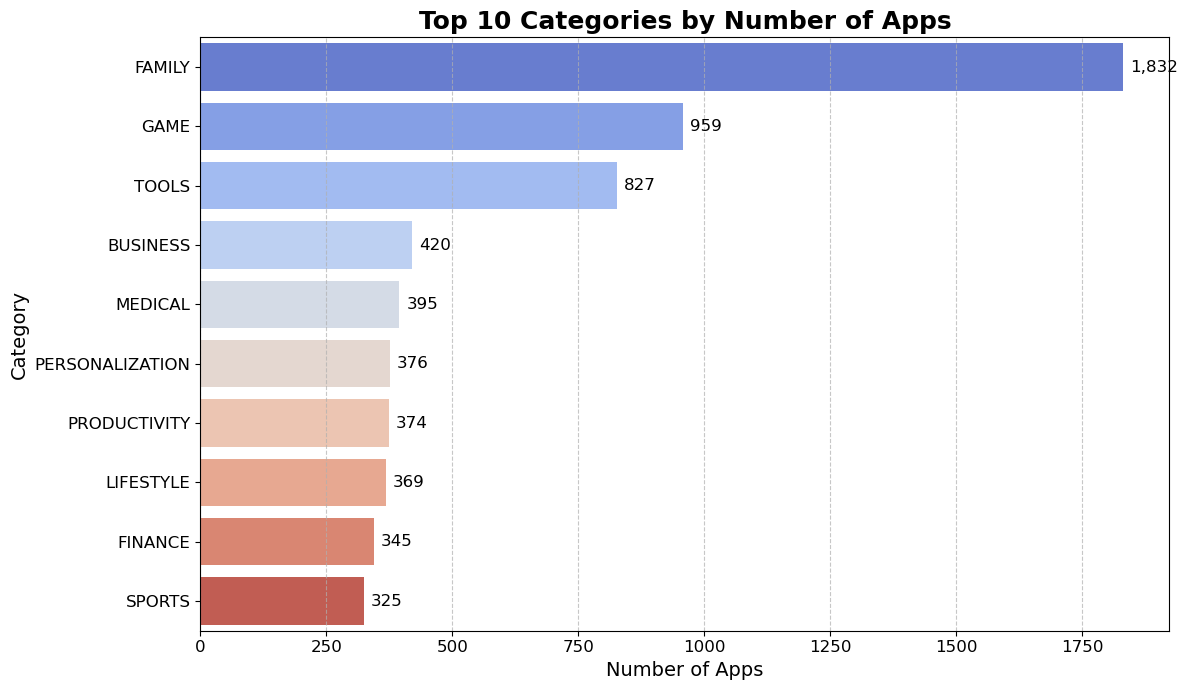

In [49]:
# Top Categories by Number of Apps
top_categories_by_apps = data_set['Category'].value_counts().head(10)

plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=top_categories_by_apps.values, y=top_categories_by_apps.index, palette='coolwarm')

for bar in bar_plot.patches:
    total_apps = f'{int(bar.get_width()):,}'  # Display the total number of apps
    plt.annotate(total_apps, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Top 10 Categories by Number of Apps', fontsize=18, fontweight='bold')
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Top Categories by Download Count: This bar chart shows the categories with the most installs, highlighting the most popular categories.
- Top Categories by Rating: This helps identify the categories where apps tend to have the highest user satisfaction.
- Top Categories by Number of Apps: This shows which categories have the highest number of apps available on the store, providing insight into competition and saturation.

# Monetization Strategies

examine how different monetization strategies (Free, Paid, In-app purchases) affect app ratings and download counts.

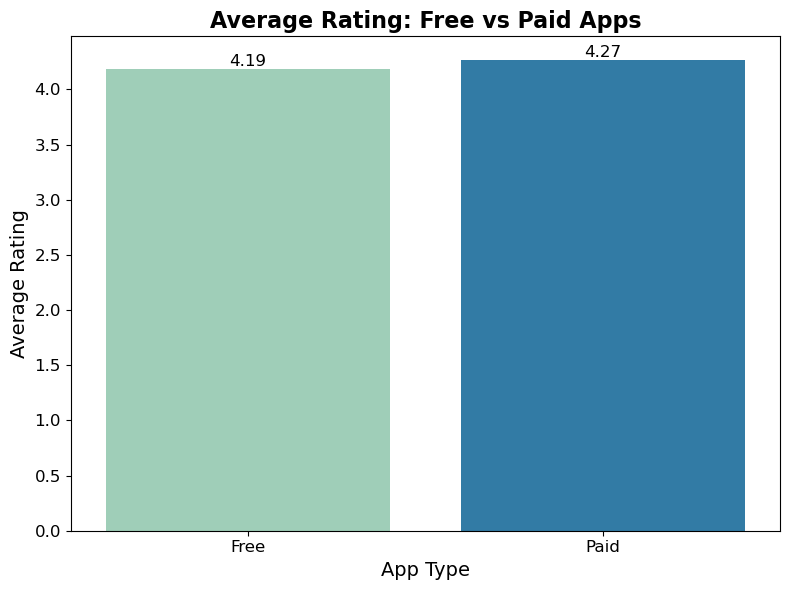

In [54]:
# Effect of Free vs Paid apps on Ratings
free_paid_ratings = data_set.groupby('Type')['Rating'].mean()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=free_paid_ratings.index, y=free_paid_ratings.values, palette='YlGnBu')

for bar in bar_plot.patches:
    avg_rating = f'{bar.get_height():.2f}'  # Display average rating with two decimal places
    plt.annotate(avg_rating, 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Average Rating: Free vs Paid Apps', fontsize=16, fontweight='bold')
plt.xlabel('App Type', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


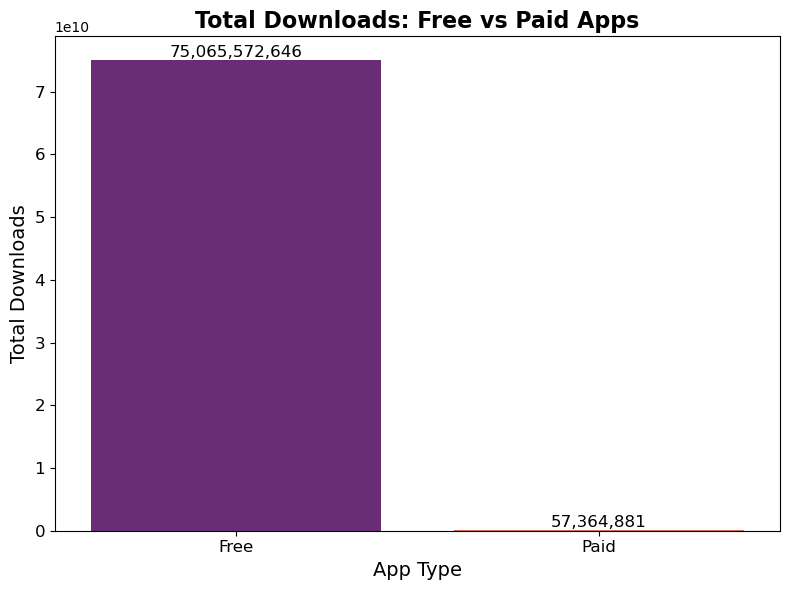

In [57]:
# Effect of Free vs Paid apps on Download Counts

free_paid_installs = data_set.groupby('Type')['Installs'].sum()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=free_paid_installs.index, y=free_paid_installs.values, palette='magma')

for bar in bar_plot.patches:
    total_installs = f'{int(bar.get_height()):,}'
    plt.annotate(total_installs, 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Total Downloads: Free vs Paid Apps', fontsize=16, fontweight='bold')
plt.xlabel('App Type', fontsize=14)
plt.ylabel('Total Downloads', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [58]:
# Relationship between In-app Purchases and Ratings


# create a new column in dataset to check if apps have in-app purchases
data_set['Has In-app Purchases'] = data_set['Price'] > 0

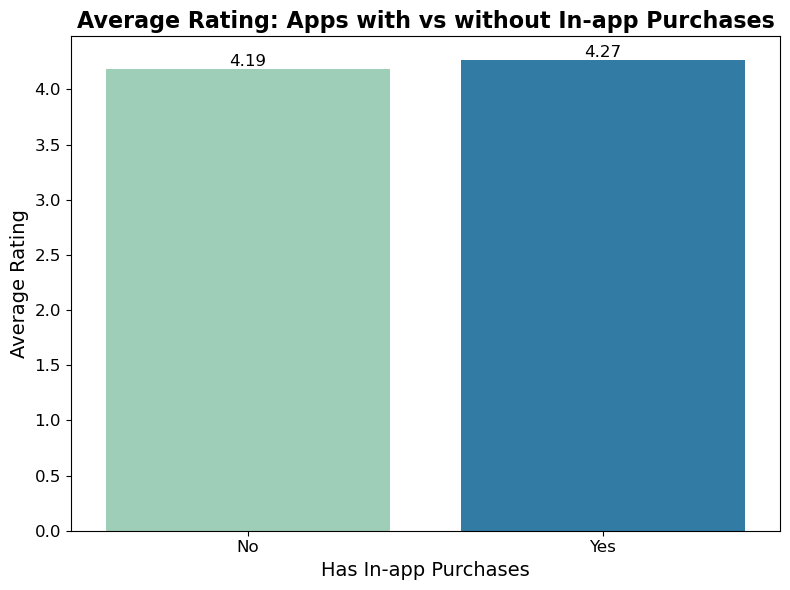

In [61]:
inapp_ratings = data_set.groupby('Has In-app Purchases')['Rating'].mean()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=inapp_ratings.index, y=inapp_ratings.values, palette='YlGnBu')

for bar in bar_plot.patches:
    avg_rating = f'{bar.get_height():.2f}' 
    plt.annotate(avg_rating, 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Average Rating: Apps with vs without In-app Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Has In-app Purchases', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [62]:
data_set.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Has In-app Purchases
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,False


# Insights

# User Ratings
- Missing Values: The Rating column has significant missing values (9367 out of 10841 entries). There are also missing values in other columns like Type, Content Rating, Current Version, and Android Version.
- Data Issues: The Reviews, Size, Installs, and Price columns are stored as objects, even though they should likely be numeric. Additionally, the Rating column contains unrealistic values (like a maximum value of 19 when ratings typically range between 1 and 5).
- Popular Categories: Categories with the highest number of apps and downloads were examined, as well as those with the highest user satisfaction (i.e., high average ratings). These categories are potential targets for developing successful apps.


# Download Counts
- Top Categories by Download: A bar chart is used to highlight the categories with the highest download counts. This indicates which categories are most popular and have the largest user bases.
- Download vs. Rating: The analysis examines how download counts correlate with app ratings, providing insight into how popularity (in terms of installs) aligns with user satisfaction.


# Category Success
- No specific insights found in the about category success beyond downloads and ratings.


# Monetization Strategies
- Monetization Impact: The examines how different monetization strategies (free, paid, in-app purchases) affect both app ratings and download counts. This analysis is important for understanding how pricing models influence app performance and user engagement.

# Recommendations

# 1. Focus on High-Rating Categories for Better User Engagement
Insight: Categories with high average ratings indicate greater user satisfaction.

Recommendation: Developers should prioritize creating apps in categories where user satisfaction tends to be higher ( Productivity, Health & Fitness). Investing in these categories increases the likelihood of positive user reviews and higher retention rates, which can translate to better visibility in app stores and more organic downloads.

# 2.Improve App Quality to Minimize Outliers in Ratings
Insight: The dataset contains apps with ratings that fall outside the typical 1 to 5 range, suggesting possible data entry errors or poor-quality apps.

Recommendation: Ensuring high app quality (smooth user experience, reliable updates, and strong functionality) will keep ratings within acceptable ranges and avoid extreme negative ratings. This can be achieved by consistently releasing updates, responding to user feedback, and focusing on core app features.

# 3. Monetization Strategy Must Align with App Category
Insight: Different monetization strategies (free, paid, in-app purchases) have varying impacts on app ratings and download counts.

Recommendation: Developers should align their monetization strategy with the user expectations in each category. For example, gaming apps often thrive on in-app purchases, while utility apps (like calculators or note-taking apps) may perform better when offered for free with ads or a freemium model. Paid apps should focus on premium, high-quality content to justify the cost and attract long-term users.

# 4. Prioritize Categories with High Download Potential
Insight: Categories like Communication, Social Media, and Entertainment have the highest download counts.

Recommendation: Developers looking for maximum exposure should focus on high-demand categories. However, they should be aware of the competitive nature of these categories and differentiate their product with unique features or user experiences. For marketers, concentrating advertising efforts in these popular categories can yield higher returns on investment.

# 5. Focus on Mobile Optimization and Update Frequency
Insight: Some apps in the dataset have outdated versions or are not optimized for recent Android versions.

Recommendation: Ensuring compatibility with the latest Android versions and frequent updates can improve user satisfaction and retention. By supporting a wide range of devices and optimizing for mobile usage, developers can reach a larger audience. Consistent updates not only resolve bugs but also introduce new features that keep users engaged.

# 6. Explore Freemium Models for Long-Term Monetization
Insight: Free apps tend to have higher download counts, but paid apps and apps with in-app purchases can achieve higher long-term profitability.

Recommendation: Consider adopting a freemium model, where the app is free to download but offers premium features through in-app purchases. This strategy can attract a larger user base initially and gradually convert free users to paying customers. Offering trials or discounts on premium features can also help in user acquisition.